In [462]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from fuzzywuzzy import fuzz
from collections import Counter
import arxiv
from datetime import datetime
import lightgbm as lgbm
from sklearn import linear_model,preprocessing

In [26]:
class Paper:
    def __init__(self):
        self.outlinks = []
        self.inlinks = []
        self.abstract = ""
        self.page_rank = 1
        self.authors = []
        self.keywords = []
#         self.authors_org = []
        self.journal = None
        self.year = None
        self.title = None
        self.id = None
        self.duration = None
        self.conf_score = 0
        self.conf_topic = None
        self.reach_count = 0
        self.extra = {}
        
    def __repr__(self):
        print("###########\noutlinks = %s\n, inlinks = %s\n, abstract = %s\n, keywords = %s\n, page_rank = %s\n, authors \
              = %s\n, journal = %s\n, year = %s\n, title = %s\n, id = %s\n###########\n" % (str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id)))
        return "###########\noutlinks = {}\n, inlinks = {}\n, abstract = {}\n, keywords = {}\n, page_rank = {}\n, authors \
              = {}\n, journal = {}\n, year = {}\n, title = {}\n, id = {}\n###########\n".format(str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id))
    def __str__(self):
        print("###########\noutlinks = %s\n, inlinks = %s\n, abstract = %s\n, keywords = %s\n, page_rank = %s\n, authors \
              = %s\n, journal = %s\n, year = %s\n, title = %s\n, id = %s\n###########\n" % (str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id)))
        return "###########\noutlinks = {}\n, inlinks = {}\n, abstract = {}\n, keywords = {}\n, page_rank = {}\n, authors \
              = {}\n, journal = {}\n, year = {}\n, title = {}\n, id = {}\n###########\n".format(str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id))

In [27]:
def parse_file(filepath, graph):
    with open(filepath, "r") as f:
        content = f.readlines()
    
    print(content[:20])
    print(len(content))
    obj = None
    i = 0
    while i < len(content):
        if not obj:
            obj = Paper()
        
        if content[i] == '  \n':
#             print("here")
            graph[obj.id] = obj
            obj = None
        else:
#             print("here")
            try:
                if content[i][1] == "*":
                    obj.title = content[i][2:].rstrip("\n")
                elif content[i][1] == "@":
                    obj.authors = content[i][2:].rstrip("\n").split(",")
                elif content[i][1] == "t":
                    obj.year = int(content[i][2:].rstrip("\n"))
                elif content[i][1] == "c":
                    obj.journal = content[i][2:].rstrip("\n")
                elif content[i][1] == "i":
                    obj.id = content[i][6:].rstrip("\n")
                elif content[i][1] == "%":
                    obj.outlinks.append(content[i][2:].rstrip("\n"))
                elif content[i][1] == "!":
                    obj.abstract = content[i][2:].rstrip("\n")
            except:
#                 print(i)
                print(content[i])
            
        i += 1
        
    

In [28]:
citation_graph = {}
parse_file("data/DBLP_Citation_2014_May/publications.txt", citation_graph)

['#*OQL[C++]: Extending C++ with an Object Query Capability.\n', '#@José A. Blakeley\n', '#t1995\n', '#cModern Database Systems\n', '#index2\n', '#% \n', '#!\n', '  \n', '#*Transaction Management in Multidatabase Systems.\n', '#@Yuri Breitbart,Hector Garcia-Molina,Abraham Silberschatz\n', '#t1995\n', '#cModern Database Systems\n', '#index3\n', '#% \n', '#!\n', '  \n', '#*Overview of the ADDS System.\n', '#@Yuri Breitbart,Tom C. Reyes\n', '#t1995\n', '#cModern Database Systems\n']
20797701




In [29]:
len(citation_graph)

2146341

In [30]:
import csv

conf_full_dict = {}
conf_abbr_dict = {}

with open("data/conf.csv", "r+") as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        conf_full_dict[row[1].lower()] = int(row[3])
        conf_abbr_dict[row[2].lower()] = int(row[3])
print(len(conf_full_dict))
print(len(conf_abbr_dict))

945
801


In [31]:
citation_graph["27"]

###########
outlinks = [' ']
, inlinks = []
, abstract = An overview is presented of the use of spatial data structures in spatial databases. The focus is on hierarchical data structures, including a number of variants of quadtrees, which sort the data with respect to the space occupied by it. Such techniques are known as spatial indexing methods. Hierarchical data structures are based on the principle of recursive decomposition. They are attractive because they are compact and depending on the nature of the data they save space as well as time and also facilitate operations such as search. Examples are given of the use of these data structures in the representation of different data types such as regions, points, rectangles, lines, and volumes.
, keywords = []
, page_rank = 1
, authors               = ['Hanan Samet']
, journal = Modern Database Systems
, year = 1995
, title = Spatial Data Structures.
, id = 27
###########



###########
outlinks = [' ']
, inlinks = []
, abstract = An overview is presented of the use of spatial data structures in spatial databases. The focus is on hierarchical data structures, including a number of variants of quadtrees, which sort the data with respect to the space occupied by it. Such techniques are known as spatial indexing methods. Hierarchical data structures are based on the principle of recursive decomposition. They are attractive because they are compact and depending on the nature of the data they save space as well as time and also facilitate operations such as search. Examples are given of the use of these data structures in the representation of different data types such as regions, points, rectangles, lines, and volumes.
, keywords = []
, page_rank = 1
, authors               = ['Hanan Samet']
, journal = Modern Database Systems
, year = 1995
, title = Spatial Data Structures.
, id = 27
###########

In [32]:
def init_dict(df, graph):
    for index, row in df.iterrows():
        id = row["id"]
        if id not in graph.keys():
            graph[id] = Paper()
            graph[id].outlinks = [] if not isinstance(row["references"], list) else row["references"]
            graph[id].abstract = "" if(row["abstract"]==None) else row["abstract"]
            graph[id].keywords = [] if not isinstance(row["keywords"], list) else row["keywords"]
            graph[id].n_citations = row["n_citation"]
    #         authors = json.loads(row["authors"])
    #         print(row["authors"])
            if isinstance(row["authors"], list):
                for author in row["authors"]:
                    org = ""
                    name = ""
                    if "org" in author.keys():
                        org = author["org"]
                    if "name" in author.keys():
                        name = author["name"]

                    graph[id].authors.append((name, org))

            graph[id].journal = "" if(row["venue"]==None) else row["venue"]
            graph[id].year =  1700 if(row["year"]==None) else row["year"]
            graph[id].title = "" if(row["title"]==None) else row["title"]
import math        
def fill_dict(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].inlinks = []
    for id in graph.keys():
        graph[id].page_rank = 1/length
        refs = graph[id].outlinks
#         print(refs)
        for ref in refs:
            if ref in graph.keys():
                graph[ref].inlinks.append(id)
    unique_years = []
    for id in graph.keys():
        if(math.isnan(graph[id].year)):
            graph[id].year = 1700
        if graph[id].year != 1700:
            unique_years.append(2018 - graph[id].year)
            graph[id].duration = 2018 - graph[id].year
#     print(list(unique_years))
    median_duration = np.median(list(unique_years))
    print(median_duration)
    for id in graph.keys():
        if graph[id].year == 1700:
            graph[id].duration = median_duration

In [33]:
def reset_page_rank(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].page_rank = 1/length

In [34]:
# refer here  : http://dpk.io/pagerank
def page_rank(maxiters, epsilon, damping, graph):
    for i in range(maxiters):
        print(i)
        old_ranks = {}
        for id in graph.keys():
            old_ranks[id] = graph[id].page_rank
            page_rank = (1-damping)/len(graph.keys())
            citations = graph[id].inlinks
            for cite_id in citations:
                page_rank += damping*(graph[cite_id].page_rank/len(graph[cite_id].outlinks))
#             print(page_rank)
#             if len(citations)!=0:
            graph[id].page_rank = page_rank
        delta = sum([abs(old_ranks[id] - graph[id].page_rank) for id in graph.keys()])
        if delta < epsilon:
            break


In [43]:
with open("dblp_unfilled.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [35]:
fill_dict(citation_graph)

12.0


In [36]:
reset_page_rank(citation_graph)
page_rank(100,1.0e-8,0.85, citation_graph)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [37]:
with open("dict_dblp7_page_rank_new.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [26]:
citation_graph = {}
with open("page_rank_dict_dblp7.pkl", "rb+") as f:
    citation_graph = pickle.load(f)

EOFError: Ran out of input

In [38]:
max_h5_index = max(conf_full_dict, key = lambda x : conf_full_dict[x])
max_h5_index = conf_full_dict[max_h5_index]
min_h5_index = min(conf_full_dict, key = lambda x : conf_full_dict[x])
min_h5_index = conf_full_dict[min_h5_index]

for conf_name in conf_full_dict.keys():
    conf_full_dict[conf_name] = (conf_full_dict[conf_name] - min_h5_index)/(max_h5_index - min_h5_index)
for conf_name in conf_abbr_dict.keys():
    conf_abbr_dict[conf_name] = (conf_abbr_dict[conf_name] - min_h5_index)/(max_h5_index - min_h5_index)


In [39]:
count = 0
count1 = 0
conf_dict_merged = {**conf_full_dict, **conf_abbr_dict}
del conf_dict_merged[""]
conf_names = sorted(conf_dict_merged.keys())
from collections import defaultdict
alpha_conf_dict = defaultdict(list)
for conf_name in conf_names:
    alpha_conf_dict[conf_name[0]].append(conf_name)

for i,id in enumerate(list(citation_graph.keys())):
    p_obj = citation_graph[id]
    if p_obj.journal.lower() in alpha_conf_dict[p_obj.journal.lower()[0]]:
        count += 1
        citation_graph[id].page_rank *= conf_dict_merged[p_obj.journal.lower()]
    else:
        fz_ratio_max = 0
        fz_conf = ""
        j = p_obj.journal.lower()
        for conf in alpha_conf_dict[j[0]]:
            fz_ratio = fuzz.ratio(j, conf)
            if fz_ratio > fz_ratio_max:
                fz_ratio_max = fz_ratio
                fz_conf = conf
            if fz_ratio_max >= 70:
                break
        if fz_ratio_max == 0:
            count1 += 1
            citation_graph[id].page_rank *= 0.5
        else:
            citation_graph[id].page_rank *= conf_dict_merged[fz_conf]
    if i%1000 == 0:
        print(i)
            
print("%d/%d" % (count, len(citation_graph)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1164000
1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000


In [40]:
with open("dict_dblp7_page_rank_fuzzy_new.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [41]:
print("%d/%d" % (count1, len(citation_graph)))

4056/2146341


In [42]:
page_ranks = set()
for id in citation_graph.keys():
    page_ranks.add(citation_graph[id].page_rank)
print(len(page_ranks))

371095


In [25]:
with open("page_rank_dict.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [3]:
with open('page_rank_dict.pkl', "rb") as file:
    citation_graph = pickle.load(file)

In [99]:
year_wise_paper_count = defaultdict(lambda: 0)

for paper in citation_graph:
    year_wise_paper_count[citation_graph[paper].year] += 1

In [103]:
year_wise_topic_score = defaultdict(lambda : defaultdict(int))
for i, topic in enumerate(list(year_wise_topic_dict.keys())):
    for year in year_wise_topic_dict[topic].keys():
        year_wise_topic_score[topic][year] = year_wise_topic_dict[topic][year]/year_wise_paper_count[year]

In [191]:
len(year_wise_topic_score)

154

In [258]:
def reach(paper_id):
    '''
    for each paper in inlinks
        Reach += domain_score_of_paper * length of inlinks of paper 
    return reach
    '''
    reach = 0
    denom = 1
    topics = set(conf_topic_dict[citation_graph[paper_id].journal.lower()])
    for paper in citation_graph[paper_id].inlinks:
        topic = conf_topic_dict[citation_graph[paper].journal.lower()]
        topics.add(topic)
        domain_score = year_wise_topic_score[topic][citation_graph[paper].year]
        reach += domain_score * (1 + len(citation_graph[paper].inlinks))
        denom += len(citation_graph[paper].inlinks)
    reach = reach * len(topics)/len(year_wise_topic_score)
    return 1 + reach/denom
#     return 1 + len(topics)/len(year_wise_topic_score)


In [259]:
for paper_id in citation_graph:
    citation_graph[paper_id].reach_count = reach(paper_id)

In [230]:
def calc_duration_score():
    for i, paper_id in enumerate(list(citation_graph.keys())):
        duration_score = 0
        l = len(citation_graph[paper_id].inlinks) + 1
        for i_pid in citation_graph[paper_id].inlinks:
            duration_score +=  abs(citation_graph[paper_id].year - citation_graph[i_pid].year)
        citation_graph[paper_id].extra["duration_score"] = 1 + math.log(1 + duration_score/l, 100)
        if i % 1000 == 0:
            print(i)

In [231]:
calc_duration_score()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000
1289000
1290000
1291000
1292000
1293000
1294000
1295000
1296000
1297000
1298000
1299000
1300000
1301000
1302000
1303000
1304000
1305000
1306000
1307000
1308000
1309000
1310000
1311000
1312000
1313000
1314000
1315000
1316000
1317000
1318000


In [246]:
m = max(citation_graph, key = lambda x : citation_graph[x].extra["duration_score"])

In [247]:
citation_graph[m].authors

['Mervin E. Muller']

In [195]:
# # Normalize reach scores
# max_reach = max([citation_graph[paper].reach_count for paper in citation_graph])
# min_reach = min([citation_graph[paper].reach_count for paper in citation_graph])
# for paper in citation_graph:
#     citation_graph[paper].reach_count = (citation_graph[paper].reach_count - min_reach) / (max_reach - min_reach)

In [196]:
len(citation_graph)

2146341

In [660]:
class Author:
    def __init__(self):
        self.author_org_list = []
        self.paper_list = []
        self.citations = []
        self.author_score = 0
        self.author_score_2 = 0
        self.author_score_list = []
        self.h_index = 0
        self.domains = []    
        self.extra = {}
        
def create_author_map(graph):
    authors_map = {}
    for paper_id in graph.keys():
        for a_index,a_name in enumerate(graph[paper_id].authors):
            if a_name and len(a_name)>4:
                if a_name not in authors_map.keys():
                    authors_map[a_name] = Author()
#                 authors_map[a_name].author_org_list.append(a_org)
                authors_map[a_name].paper_list.append(paper_id)
                authors_map[a_name].citations.append(len(graph[paper_id].inlinks))
                authors_map[a_name].author_score += graph[paper_id].page_rank
                author_index_weight = 1/(2**a_index)
                authors_map[a_name].author_score_list.append(graph[paper_id].reach_count*author_index_weight*graph[paper_id].page_rank*math.log10(((len(graph[paper_id].inlinks) + 1)/graph[paper_id].duration)))
        
    for a_name in authors_map.keys():
#         authors_map[a_name].author_score = authors_map[a_name].author_score / len(authors_map[a_name].paper_list)
#         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list)
         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list) + math.log10(len(authors_map[a_name].paper_list))/len(citation_graph)
    return authors_map
        

In [417]:
author_map = create_author_map(citation_graph)

In [418]:
def calc_h_index(author_map):
    for a_name in author_map.keys():
        author_map[a_name].citations.sort()
        i = 0
        l = len(author_map[a_name].citations)
        while i < l and author_map[a_name].citations[l-1-i] > i:
            i += 1
        author_map[a_name].h_index = i
        
        
        
        

In [419]:
calc_h_index(author_map)


In [420]:
#[((citation_graph[x].year, sum([citation_graph[x].n_citations if for y in author_map['WANG Wei'].paper_list])) for x in author_map['WANG Wei'].paper_list))

def year_wise_citations(a_name):
    paper_list = author_map[a_name].paper_list
    print(len(paper_list))
    from collections import defaultdict
    d = defaultdict(int)
    for p_id in paper_list:
        d[citation_graph[p_id].year] += len(citation_graph[p_id].inlinks)
    return sorted([(k,d[k]) for k in d.keys()], key = lambda x: x[0])


In [9]:
with open("author_map.pkl", "rb") as f:
    author_map = pickle.load(f)

In [155]:
with open("author_map_12032018_v2.pkl", "wb") as f:
    pickle.dump(author_map, f)

In [421]:
def top_n(n, auths):
    return auths[:n]

In [422]:
author_names_h = sorted(author_map.keys(), key = lambda x: author_map[x].h_index)[::-1]
author_names = sorted(author_map.keys(), key = lambda x: author_map[x].author_score_2)[::-1]

top_n_our_index = top_n(1000, author_names)
top_n_h_index = top_n(1000, author_names_h)

In [423]:
author_names_h[:50]

['Hector Garcia-Molina',
 'Scott Shenker',
 'Jiawei Han',
 'Christos Faloutsos',
 'Moni Naor',
 'Rakesh Agrawal',
 'Anil K. Jain',
 'Thomas A. Henzinger',
 'Jennifer Widom',
 'Philip S. Yu',
 'Christos H. Papadimitriou',
 'David E. Culler',
 'Rajeev Motwani',
 'Ian T. Foster',
 'Dan Suciu',
 'W. Bruce Croft',
 'Mihir Bellare',
 'Hari Balakrishnan',
 'Deborah Estrin',
 'David J. DeWitt',
 'Oded Goldreich',
 'Jon M. Kleinberg',
 'Ronald Fagin',
 'Jeffrey D. Ullman',
 'Thomas E. Anderson',
 'Robert Endre Tarjan',
 'Michael Stonebraker',
 'Edmund M. Clarke',
 'Moshe Y. Vardi',
 'Raghu Ramakrishnan',
 'Joseph M. Hellerstein',
 'Mihalis Yannakakis',
 'Amit Sahai',
 'Martín Abadi',
 'Thomas W. Reps',
 'Jeffrey F. Naughton',
 'Ran Canetti',
 'Pat Hanrahan',
 'H. V. Jagadish',
 'Dan Boneh',
 'Ravi Kumar',
 'Madhu Sudan',
 'Serge Abiteboul',
 'Ken Kennedy',
 'Rajeev Alur',
 'Wei-Ying Ma',
 'Amir Pnueli',
 'Robert E. Schapire',
 'Monica S. Lam',
 'Ion Stoica']

In [281]:
author_names.index('Matthias Mann')

125173

In [424]:
author_names[:50]

['Bui Tuong Phong',
 'M. Kirby',
 'Neil D. McKay',
 'Vincent D. Park',
 'Burton H. Bloom',
 'Josh Broch',
 'Xuanli Lisa Xie',
 'Gregory K. Wallace',
 'Hans Eriksson',
 'James W. Layland',
 'Gregory A. Klanderman',
 'Margaret J. Corasick',
 'Anit Chakraborty',
 'Tony Ballardie',
 'Jean Babaud',
 'Richard M. Russell',
 'Martin Lades',
 'Didier Le Gall',
 'Wei Wang',
 'David Maltz',
 'Martin E. Newell',
 'Wei Zhang',
 'Lei Zhang',
 'Wei Li',
 'H. Vincent Poor',
 'Jun Wang',
 'Philip S. Yu',
 'Wen Gao',
 'Lei Wang',
 'Thomas S. Huang',
 'Li Zhang',
 'Chin-Chen Chang',
 'Elisa Bertino',
 'Jun Zhang',
 'Ming Li',
 'Yang Liu',
 'Yan Zhang',
 'Jiawei Han',
 'Wei Liu',
 'Xin Li',
 'Edwin R. Hancock',
 'Wei Chen',
 'Ajith Abraham',
 'Mario Piattini',
 'Jie Wu',
 'Sudhakar M. Reddy',
 'Hui Zhang',
 'Witold Pedrycz',
 'Mahmut T. Kandemir',
 'Hans-Peter Seidel']

In [ ]:
author_map['istvan simon'].paper_list

In [425]:
for author in author_names[:100]:
    print(author, year_wise_citations(author))
    

1
Bui Tuong Phong [(1975, 239)]
2
M. Kirby [(1990, 244), (2011, 0)]
1
Neil D. McKay [(1992, 908)]
2
Vincent D. Park [(1997, 321), (2010, 2)]
1
Burton H. Bloom [(1970, 810)]
2
Josh Broch [(1998, 702), (1999, 31)]
1
Xuanli Lisa Xie [(1991, 283)]
2
Gregory K. Wallace [(1991, 247)]
1
Hans Eriksson [(1994, 122)]
1
James W. Layland [(1973, 1260)]
1
Gregory A. Klanderman [(1993, 346)]
1
Margaret J. Corasick [(1975, 405)]
1
Anit Chakraborty [(2000, 526)]
1
Tony Ballardie [(1993, 161)]
1
Jean Babaud [(1986, 92)]
1
Richard M. Russell [(1978, 129)]
2
Martin Lades [(1993, 244)]
2
Didier Le Gall [(1991, 241), (2010, 0)]
1293
Wei Wang [(1987, 0), (1992, 4), (1994, 1), (1995, 1), (1996, 6), (1997, 168), (1998, 34), (1999, 4), (2000, 57), (2001, 40), (2002, 263), (2003, 302), (2004, 243), (2005, 297), (2006, 322), (2007, 265), (2008, 175), (2009, 279), (2010, 95), (2011, 38), (2012, 8), (2013, 0)]
2
David Maltz [(1995, 58), (1997, 475)]
2
Martin E. Newell [(1976, 128), (1982, 0)]
856
Wei Zhang [(1990,

Joseph Y. Halpern [(1980, 5), (1981, 7), (1982, 33), (1983, 56), (1984, 177), (1985, 119), (1986, 24), (1987, 110), (1988, 18), (1989, 86), (1990, 438), (1991, 115), (1992, 278), (1993, 44), (1994, 137), (1995, 69), (1996, 82), (1997, 67), (1998, 92), (1999, 146), (2000, 56), (2001, 87), (2002, 137), (2003, 52), (2004, 188), (2005, 85), (2006, 143), (2007, 48), (2008, 70), (2009, 8), (2010, 1), (2011, 7), (2012, 4), (2013, 0)]
432
Jie Zhang [(1998, 5), (1999, 0), (2000, 0), (2002, 6), (2003, 8), (2004, 95), (2005, 64), (2006, 92), (2007, 35), (2008, 17), (2009, 27), (2010, 20), (2011, 10), (2012, 0), (2013, 0)]
430
Sushil Jajodia [(1983, 6), (1984, 1), (1985, 0), (1986, 0), (1987, 53), (1988, 7), (1989, 14), (1990, 61), (1991, 32), (1992, 72), (1993, 45), (1994, 8), (1995, 52), (1996, 116), (1997, 474), (1998, 134), (1999, 65), (2000, 180), (2001, 269), (2002, 267), (2003, 654), (2004, 108), (2005, 120), (2006, 102), (2007, 108), (2008, 58), (2009, 48), (2010, 36), (2011, 2), (2012, 1)

In [426]:
for author in author_names_h[:100]:
    print(author, year_wise_citations(author))
    

411
Hector Garcia-Molina [(1978, 0), (1979, 0), (1982, 93), (1983, 0), (1984, 8), (1985, 148), (1986, 113), (1987, 309), (1988, 108), (1989, 72), (1990, 138), (1991, 43), (1992, 218), (1993, 15), (1994, 213), (1995, 618), (1996, 529), (1997, 493), (1998, 734), (1999, 179), (2000, 505), (2001, 674), (2002, 807), (2003, 1175), (2004, 536), (2005, 141), (2006, 77), (2007, 83), (2008, 249), (2009, 159), (2010, 36), (2011, 40), (2012, 1)]
201
Scott Shenker [(1987, 338), (1988, 30), (1989, 398), (1990, 54), (1991, 167), (1992, 181), (1993, 67), (1994, 437), (1995, 386), (1996, 3), (1997, 57), (1998, 174), (1999, 88), (2000, 268), (2001, 1830), (2002, 1739), (2003, 1153), (2004, 307), (2005, 524), (2006, 157), (2007, 263), (2008, 223), (2009, 35), (2010, 54), (2011, 6), (2012, 1), (2013, 0)]
580
Jiawei Han [(1986, 11), (1987, 8), (1988, 13), (1989, 22), (1990, 11), (1991, 7), (1992, 105), (1993, 84), (1994, 46), (1995, 376), (1996, 577), (1997, 58), (1998, 172), (1999, 240), (2000, 1246), (20

In [427]:
author_map['Wei Wang'].author_score

1.1356834179738646e-05

In [428]:
author_names_h.index("Michael Stonebraker")

26

In [429]:
1/len(citation_graph)

4.659091915031209e-07

1
2
1
2
1
2
1
2
1
1
1
1
1
1
1
1
2
2
1293
2
2
856
842
805
735
717
711
707
690
691
688
680
670
652
646
641
632
580
582
571
567
564
554
550
552
549
529
531
520
510
511
507
505
504
499
495
490
490
494
490
485
484
481
481
482
481
1
474
472
466
471
466
460
454
451
452
447
445
444
441
440
439
2
433
432
430
427
425
424
422
422
421
417
416
413
416
413
411
411
412
410
421
411
409
406
403
401
402
399
397
397
393
391
400
390
388
387
387
389
385
386
385
383
380
380
379
377
376
374
377
373
374
374
372
372
372
372
372
370
369
374
1
369
370
366
366
366
365
364
363
363
2
368
361
360
359
361
359
359
359
355
356
352
352
352
352
353
351
349
348
349
349
345
344
341
344
342
336
337
335
334
337
333
333
330
329
326
326
327
327
327
324
323
323
324
326
322
321
323
320
319
319
321
316
315
317
315
316
315
314
313
314
312
312
311
2
310
312
311
309
310
310
311
309
309
307
307
306
309
306
305
305
307
304
305
304
303
304
302
304
304
303
312
302
307
301
301
299
298
300
300
301
299
298
297
297
298
296
295
295
296
295
2

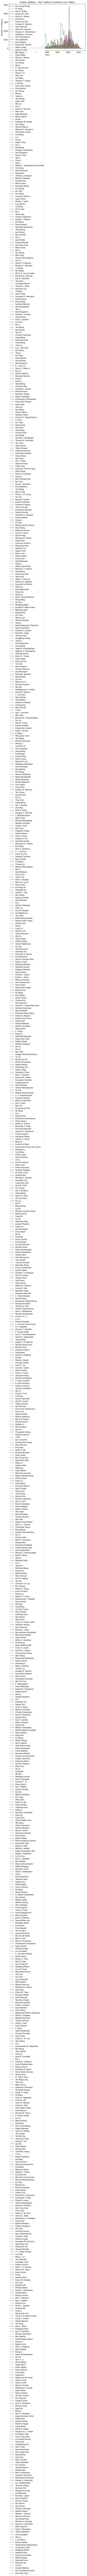

In [430]:
plt.figure(figsize=(8,5))
for author in top_n_our_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_our_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on our index)')
plt.show()

411
201
580
374
226
199
441
348
180
711
355
173
195
336
230
249
204
151
185
183
370
182
154
254
105
270
239
256
447
227
162
214
151
207
170
169
155
119
237
184
206
206
260
179
215
289
262
136
107
144
209
125
116
411
263
103
179
386
70
90
261
113
193
220
128
403
363
360
131
123
277
139
275
210
130
433
670
152
330
172
188
136
139
113
144
445
158
80
189
320
163
94
231
301
78
269
223
196
141
175
345
165
141
254
123
173
135
147
430
307
79
117
204
387
170
93
167
179
186
96
229
201
82
162
161
270
256
86
131
263
152
137
193
157
138
105
123
151
235
200
151
406
202
273
97
143
114
118
176
153
128
61
132
128
249
71
129
327
481
119
138
122
167
121
148
187
133
137
133
124
185
154
118
143
148
105
171
315
101
151
105
159
66
146
193
100
352
216
165
228
92
131
95
149
277
174
481
168
198
83
167
107
230
217
167
252
81
120
81
191
494
139
183
240
227
120
190
68
115
167
115
123
691
135
1293
137
162
291
301
81
163
111
286
144
102
93
233
80
207
287
84
238
221
215
302
520
91
87
268
257
166
185
74
280
187
170
22

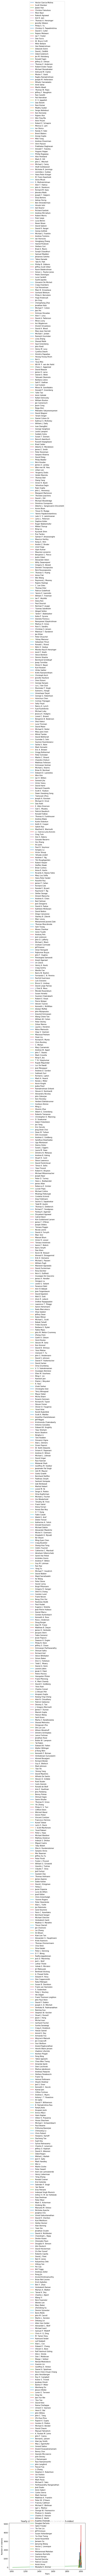

In [431]:
plt.figure(figsize=(8,5))
for author in top_n_h_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_h_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on h-index)')
plt.show()

In [432]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

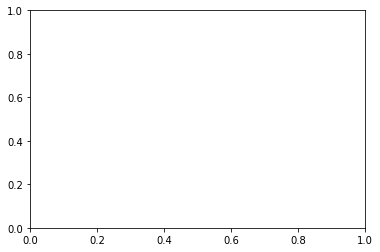

In [433]:
n_groups = 5

top_our_index = [len(author_map[author].paper_list) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [len(author_map[author].paper_list) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Papers published')
ax.set_title('Total Papers published - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_our_index) + 200)
ax.legend()
autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

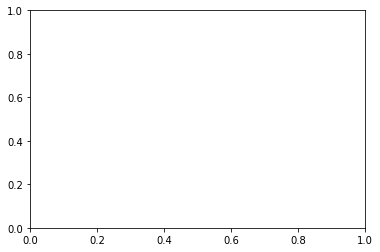

In [434]:
n_groups = 5

top_our_index = [np.average(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.average(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Average Citations')
ax.set_title('Average number of Citations - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 10)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

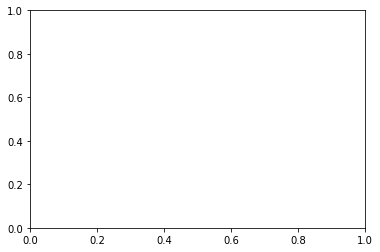

In [435]:
n_groups = 5

top_our_index = [np.median(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.median(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Median Citations')
ax.set_title('Median number of Citations - Top Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 5)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [436]:
[author_names_h.index(author) for author in top_n_our_index]

[156176,
 357439,
 297890,
 115371,
 315650,
 109886,
 302023,
 161815,
 223703,
 371438,
 318148,
 352232,
 306791,
 181965,
 240653,
 380247,
 291144,
 148076,
 224,
 107285,
 225881,
 2930,
 751,
 842,
 10754,
 1472,
 9,
 2652,
 5502,
 222,
 961,
 1706,
 76,
 2472,
 430,
 1561,
 1721,
 2,
 2104,
 992,
 1169,
 2631,
 1614,
 4687,
 1275,
 1488,
 327,
 1858,
 245,
 341,
 5696,
 8311,
 10337,
 1282,
 7327,
 14428,
 1408,
 351,
 210,
 1034,
 3255,
 6344,
 196,
 15676,
 1697,
 158,
 295711,
 10011,
 342,
 543,
 7892,
 3354,
 1805,
 4579,
 974,
 64936,
 28,
 85,
 1364,
 6,
 5545,
 10171,
 343037,
 75,
 6514,
 108,
 3538,
 1874,
 2265,
 1574,
 2091,
 737,
 19213,
 271,
 1160,
 4222,
 7423,
 53,
 0,
 6611,
 824,
 86868,
 3756,
 3375,
 141,
 65,
 489,
 1383,
 5849,
 5154,
 10212,
 10364,
 1449,
 12866,
 1409,
 6135,
 113,
 393,
 10777,
 503,
 57,
 17850,
 1683,
 1947,
 4940,
 9124,
 6694,
 4532,
 3,
 6962,
 5410,
 3941,
 3095,
 266,
 3252,
 5330,
 7075,
 2542,
 521,
 1394,
 11403,
 206862,
 5

In [437]:
[author_names.index(author) for author in top_n_h_index]

[98,
 779,
 37,
 128,
 586,
 837,
 79,
 169,
 1071,
 26,
 160,
 1193,
 863,
 177,
 547,
 454,
 769,
 1689,
 994,
 1034,
 143,
 1042,
 1630,
 435,
 3961,
 356,
 509,
 417,
 76,
 572,
 1429,
 670,
 1690,
 731,
 1252,
 1269,
 1602,
 3017,
 514,
 1022,
 736,
 737,
 396,
 1095,
 661,
 273,
 381,
 2243,
 3786,
 1912,
 716,
 2699,
 3220,
 97,
 390,
 4140,
 1105,
 120,
 8895,
 5489,
 391,
 3392,
 892,
 632,
 2605,
 105,
 149,
 154,
 2427,
 2856,
 315,
 2100,
 328,
 715,
 2508,
 83,
 32,
 1672,
 184,
 1215,
 972,
 2236,
 2096,
 3376,
 1914,
 77,
 1516,
 6941,
 943,
 199,
 1415,
 4996,
 545,
 246,
 7275,
 360,
 603,
 864,
 2011,
 1163,
 172,
 1365,
 2025,
 426,
 2797,
 1208,
 2264,
 1834,
 85,
 225,
 7100,
 3138,
 753,
 116,
 1263,
 5121,
 1313,
 1087,
 991,
 4765,
 554,
 789,
 6638,
 1441,
 1462,
 353,
 411,
 6017,
 2432,
 377,
 1676,
 2194,
 890,
 1536,
 2144,
 3966,
 2854,
 1703,
 521,
 799,
 1694,
 104,
 814,
 337,
 4707,
 1952,
 3326,
 3127,
 1143,
 1638,
 2589,
 11337,
 2392,
 2569,
 452,


In [657]:
common_authors = list(set(author_names[:1000]) & set(author_names_h[:1000]))

In [658]:
len(common_authors)

266

In [656]:
common_authors

['Joseph Y. Halpern',
 'Moti Yung',
 'Jiawei Han',
 'Luca Benini',
 'Elisa Bertino',
 'Moshe Y. Vardi',
 'Hector Garcia-Molina',
 'Philip S. Yu',
 'Anil K. Jain']

In [441]:
[author_names.index(author) for author in common_authors]

[83, 97, 37, 77, 32, 76, 98, 26, 79]

In [442]:
[author_names.index(author) for author in common_authors]

[83, 97, 37, 77, 32, 76, 98, 26, 79]

In [443]:
[author_names_h.index(author) for author in common_authors]

[75, 53, 2, 85, 76, 28, 0, 9, 6]

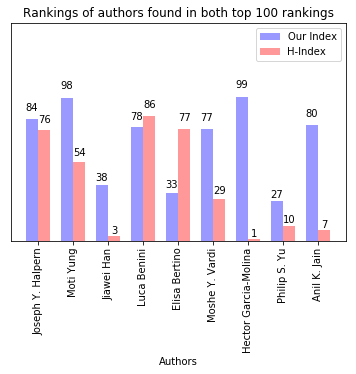

In [444]:
top_our_index = [author_names.index(author) + 1 for author in common_authors]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [author_names_h.index(author) + 1 for author in common_authors]
# std_women = (3, 5, 2, 3, 3)

n_groups = len(top_our_index)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}
# plt.figure(figsize=(18,15))
fig.size = (18,15)
rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Authors')
# ax.set_ylabel('Ranking')
ax.set_title('Rankings of authors found in both top 100 rankings')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks([])
ax.set_xticklabels(common_authors, rotation = 90)
ax.set_yticks([])
ax.set_ylim(0, 150)
ax.legend()

autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

In [75]:
def author_keywords(auth):
    keywords = []
    for paper in author_map[author].paper_list:
        keywords += citation_graph[paper].keywords
    return set(keywords)
        

In [76]:
len(author_keywords('Li Li'))

0

In [ ]:
# plots

# 1. top n authors' citations distribution 
# 2. top n authors' no. of papers distribution
# 3. missing values graph
# 4. top n authors' h-index and our index comparison
# 5. top n authors' reverse comparison
# 
# citations distribution
# 


# score
# 1. use a constant rate of decay using publish date
# 2. people with a lot of citations need to be accounted for
# 3. young authors with lesser research time need to be weighted equally 
# 4. median citations for author instead of average
# 5. journal impact factor
# 6. domain of other fields


In [27]:
len(citation_graph)

0

In [565]:
from collections import defaultdict
category_dict = defaultdict(lambda : "")
with open("data/topics.txt", "r+") as f:
    content = f.readlines()
for line in content:
    line = line.split(":")
    category_dict[line[0]] = line[1].lstrip(" ")

In [176]:
def assign_topic(paper):
    asearch = ArxivSearch()
    similar_papers = asearch.get_similar_papers(paper.title)
#     topics = [paper['arxiv_primary_category']['term'] for paper in similar_papers]
    if not similar_papers:
        return "Null"
#     most_similar_topic = Counter(topics).most_common(1)[0][0]
    most_similar_topic = similar_papers[0]['arxiv_primary_category']['term']
    return most_similar_topic
class ArxivSearch(object):
    def __init__(self, records_per_query = 20):
        self.records_per_query = records_per_query
        self.search_threshold = 20
        
    def get_papers_by_author(self, author):
        papers = []
        records_searched = 0
        while records_searched < self.search_threshold:
            query = arxiv.query(search_query=author, start=records_searched, max_results=self.records_per_query)
            for paper in query:
                if author in paper['authors']:
                    papers.append(paper)
            records_searched += self.records_per_query
        return papers
    
    def get_papers_by_year(self, year):
        papers = []
        records_searched = 0
        while records_searched < self.search_threshold:
            query = arxiv.query(search_query=str(year), start=records_searched, max_results=self.records_per_query)
            for paper in query:
                publish_date = datetime.strptime(paper['published'].split('T')[0], '%Y-%m-%d')
                if publish_date.year == year: 
                    papers.append(paper)
            records_searched += self.records_per_query
        return papers
    
    def get_papers_after(self, papers, year):
        papers_after = []
        for paper in papers:
            publish_date = datetime.strptime(paper['published'].split('T')[0], '%Y-%m-%d')
            if publish_date.year >= year:
                papers_after.append(paper)
        return papers_after
    
    def get_similar_papers(self, topic):
        query = arxiv.query(search_query=topic, start=0, max_results=1)
        return query

In [134]:
topic_year_freq_dict = defaultdict(lambda : defaultdict(int))

for i, paper_id in enumerate(list(citation_graph.keys())):
#     print("#############")
#     print(citation_graph[paper_id].title + "   ", end = "")
    topic = category_dict[assign_topic(citation_graph[paper_id])]
    topic_year_freq_dict[citation_graph[paper_id].year][topic] += 1
    if i%1000 == 0:
        print(i)
#     print("#############")

0


KeyboardInterrupt: 

In [ ]:
with open("topic_year_freq_dict.pkl", "wb") as f:
    pickle.dump(topic_year_freq_dict, f)

In [131]:
len(citation_graph)

2146341

In [132]:
len(citation_graph)

2146341

In [445]:
len(author_map)

1232503

In [137]:
asearch = ArxivSearch()
papers = asearch.get_similar_papers('Andrew Ng')
papers[0]

{'affiliation': 'None',
 'arxiv_comment': 'This paper has been withdrawn',
 'arxiv_primary_category': {'scheme': 'http://arxiv.org/schemas/atom',
  'term': 'q-fin.PM'},
 'arxiv_url': 'http://arxiv.org/abs/0911.3117v2',
 'author': 'Andrew Ng',
 'author_detail': {'name': 'Andrew Ng'},
 'authors': ['Albina Danilova', 'Michael Monoyios', 'Andrew Ng'],
 'doi': None,
 'guidislink': True,
 'id': 'http://arxiv.org/abs/0911.3117v2',
 'journal_reference': None,
 'links': [{'href': 'http://arxiv.org/abs/0911.3117v2',
   'rel': 'alternate',
   'type': 'text/html'},
  {'href': 'http://arxiv.org/pdf/0911.3117v2',
   'rel': 'related',
   'title': 'pdf',
   'type': 'application/pdf'}],
 'pdf_url': 'http://arxiv.org/pdf/0911.3117v2',
 'published': '2009-11-16T19:07:41Z',
 'published_parsed': time.struct_time(tm_year=2009, tm_mon=11, tm_mday=16, tm_hour=19, tm_min=7, tm_sec=41, tm_wday=0, tm_yday=320, tm_isdst=0),
 'summary': 'This paper has been withdrawn by the authors pending corrections.',
 'summary

In [78]:
conference_set = set()

for i, paper_id in enumerate(list(citation_graph.keys())):
    conference_set.add(citation_graph[paper_id].journal.lower())
    if i%1000==0:
        print(i)

print(len(conference_set))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1640000
1641000
1642000
1643000
1644000
1645000
1646000
1647000
1648000
1649000
1650000
1651000
1652000
1653000
1654000
1655000
1656000
1657000
1658000
1659000
1660000
1661000
1662000
1663000
1664000
1665000
1666000
1667000
1668000
1669000
1670000
1671000
1672000
1673000
1674000
1675000
1676000
1677000
1678000
1679000
1680000
1681000
1682000
1683000
1684000
1685000
1686000
1687000
1688000
1689000
1690000
1691000
1692000
1693000
1694000
1695000
1696000
1697000
1698000
1699000
1700000
1701000
1702000
1703000
1704000
1705000
1706000
1707000
1708000
1709000
1710000
1711000
1712000
1713000
1714000
1715000
1716000
1717000
1718000
1719000
1720000
1721000
1722000
1723000
1724000
1725000
1726000
1727000
1728000
1729000
1730000
1731000
1732000
1733000
1734000
1735000
1736000
1737000
1738000
1739000
1740000
1741000
1742000
1743000
1744000
1745000
1746000
1747000
1748000
1749000
1750000
1751000
1752000
1753000
1754000
1755000
1756000
1757000
1758000
1759000
1760000
1761000
1762000
1763000
1764000


In [79]:
print(len(conference_set))

8694


In [80]:
print(len(conf_names))

1734


In [82]:
print(len(conference_set - set(conf_names)))

7860


In [147]:
conference_set - set(conf_names)

{'iciar',
 'robust and online large-scale optimization',
 'systems, control, modeling and optimization',
 'eomas',
 'xp4.5 workshop on database theory',
 'emv',
 'ijagr',
 'jordan canonical form: application to differential equations',
 'sensor data and information fusion in computer vision and medicine',
 'addison-wesley series in telecommunications',
 'ecml/pkdd (3)',
 'isict',
 'okcon',
 'sle',
 'pattern recognition',
 'philosophy and cognitive science',
 'intelligenztechnologie',
 'quantitative information fusion for hydrological sciences',
 'fzi-berichte informatik',
 'euro-par workshops (2)',
 'irregular',
 'infrasec',
 'ride-nds',
 'abstract software specifications',
 'dialm-pomc',
 'para (2)',
 'icann (3)',
 'ijcse',
 'isspit',
 'artifical intelligence for human computing',
 'isvd',
 'w4a',
 'pricai workshop on intelligent agent systems',
 'peer-to-peer networking and applications',
 'synthesis lectures on the semantic web',
 'springsim (2)',
 'alenex/analc',
 'computational mo

In [148]:
with open("conference_set.pkl", "wb") as f:
    pickle.dump(conference_set, f)

In [446]:
author_index_map = {}
for i, a_name in enumerate(author_names):
    author_index_map[a_name] = [i]
for i, a_name in enumerate(author_names_h):
    author_index_map[a_name].append(i)

In [447]:
from queue import PriorityQueue

q = PriorityQueue()

for i, a_name in enumerate(list(author_map.keys())):
    m_index, h_index = author_index_map[a_name]
    diff = abs(m_index - h_index)
    
    if q.qsize() < 100:
        q.put((diff, m_index, h_index, a_name))
    else:
        top = q.get()
        if top[0] < diff:
            q.put((diff, m_index, h_index, a_name))
        else:
            q.put(top)
    if i%1000==0:
        print(i)
            
author_diff_list = []

while q.qsize() > 0:
    author_diff_list.append(q.get())
    
print(author_diff_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
[(1157469, 70308, 1227777, 'Roozbeh Izadi-Zamanabadi'), (1157715, 57999, 1215714, 'Iain Woodhouse'), (1158492, 39732, 1198224, 'Hongxing Wei'), (1159194, 29539, 1188733, 'Vahid Meghdadi'), (1159220, 41188, 1200408, 'Robert D. Finn'), (1159405, 61567, 1220972, 'Patrick Pons'), (1159692, 69858, 1229550, 'Philip J. B. Jackson'), (1160105, 41743, 1201848, 'Maurizio Migliaccio'), (1160136, 60373, 1220509, 'Noriaki Miyazaki'), (1160150, 68910, 1229060, 'Gerald M. Maggiora'), (1160207, 22859, 1183066, 'Arnold Beckmann'), (1160533, 28552, 1189085, 'Shrisha Rao'), (1160551, 5595

In [448]:
from pprint import pprint

In [449]:
pprint(author_diff_list)

[(1157469, 70308, 1227777, 'Roozbeh Izadi-Zamanabadi'),
 (1157715, 57999, 1215714, 'Iain Woodhouse'),
 (1158492, 39732, 1198224, 'Hongxing Wei'),
 (1159194, 29539, 1188733, 'Vahid Meghdadi'),
 (1159220, 41188, 1200408, 'Robert D. Finn'),
 (1159405, 61567, 1220972, 'Patrick Pons'),
 (1159692, 69858, 1229550, 'Philip J. B. Jackson'),
 (1160105, 41743, 1201848, 'Maurizio Migliaccio'),
 (1160136, 60373, 1220509, 'Noriaki Miyazaki'),
 (1160150, 68910, 1229060, 'Gerald M. Maggiora'),
 (1160207, 22859, 1183066, 'Arnold Beckmann'),
 (1160533, 28552, 1189085, 'Shrisha Rao'),
 (1160551, 55955, 1216506, 'Chia-Chi Huang'),
 (1160686, 16291, 1176977, 'Yi-Shao Lai'),
 (1160709, 68105, 1228814, 'Cristian Perra'),
 (1160748, 1231066, 70318, 'Robert C. Daley'),
 (1160859, 1232347, 71488, 'Martin Greenberger'),
 (1161547, 59216, 1220763, 'Hélène Frémont'),
 (1161659, 54281, 1215940, 'Kei Kuramoto'),
 (1161892, 58550, 1220442, 'Manuel Fernández Delgado'),
 (1161900, 40520, 1202420, 'Nan Ding'),
 (1161992

In [450]:
for _,_,_,a_name in author_diff_list:
    print("#######\na_name = %s\n author_org_list = %s\n paper_list = %s\n citations = %s\n author_score = %s\n author_score_2 = %s\n author_score_list = %s\n h_index =%s\n############" % (a_name, author_map[a_name].author_org_list, author_map[a_name].paper_list, author_map[a_name].citations, author_map[a_name].author_score, author_map[a_name].author_score_2,author_map[a_name].author_score_list, author_map[a_name].h_index))

#######
a_name = Roozbeh Izadi-Zamanabadi
 author_org_list = []
 paper_list = ['434425', '3642385', '3642344', '3444122', '3266989', '257970', '3642379', '357689', '3606261', '3388718', '3371140', '3642192', '3241823', '3484668', '3444165']
 citations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 author_score = 5.722240405709472e-08
 author_score_2 = 5.479061050121726e-07
 author_score_list = [-5.314837096539751e-09, -0.0, -0.0, -0.0, -5.5493408294243e-09, -1.0990142153894283e-09, -0.0, -6.047723504392416e-09, -1.1189354599096941e-09, -3.6498102677857654e-10, -4.562262834732207e-11, -0.0, -0.0, -1.4599241071143062e-09, -0.0]
 h_index =0
############
#######
a_name = Iain Woodhouse
 author_org_list = []
 paper_list = ['2961791', '3180704', '2960913', '3180508', '3180576', '2961905', '2960626', '3182696', '2961837', '3343913', '2960326', '2960468', '2960479', '2960144', '3123933', '3266453', '3125000', '3122693']
 citations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 aut

In [88]:
with open("conf-topic.pkl", "rb") as f:
    conf_topic_dict = pickle.load(f)

In [89]:
non_null_confs = [c for c in list(conf_topic_dict.keys()) if conf_topic_dict[c] != "null"]
count = 0
for i, conf in enumerate(list(conf_topic_dict.keys())):
    if conf_topic_dict[conf] == "null":
        fz_ratio_max = 0
        fz_conf = ""
        for nn_conf in non_null_confs:
            fz_ratio = fuzz.ratio(nn_conf, conf)
            if fz_ratio > fz_ratio_max:
                fz_ratio_max = fz_ratio
                fz_conf = nn_conf
            if fz_ratio_max >= 70:
                break
        if fz_ratio_max == 0:
            count += 1
            pass
        else:
            conf_topic_dict[conf] = conf_topic_dict[fz_conf]
    if i % 100 == 0:
        print(i)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600


In [ ]:
with open("conf_topic_dict.pkl", "wb") as f:
    pickle.dump(conf_topic_dict, f)

In [90]:
year_wise_citation_dict = defaultdict(lambda : defaultdict(int))

for i, paper_id in enumerate(list(citation_graph.keys())):
    for i_paper_id in citation_graph[paper_id].inlinks:
        year_wise_citation_dict[paper_id][citation_graph[i_paper_id].year] += 1
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000
1289000
1290000
1291000
1292000
1293000
1294000
1295000
1296000
1297000
1298000
1299000
1300000
1301000
1302000
1303000
1304000
1305000
1306000
1307000
1308000
1309000
1310000
1311000
1312000
1313000
1314000
1315000
1316000
1317000
1318000
1319000
1320000


In [91]:
year_wise_topic_dict = defaultdict(lambda : defaultdict(int))

for i, paper_id in enumerate(list(citation_graph.keys())):
    conf = citation_graph[paper_id].journal.lower()
    year = citation_graph[paper_id].year
    year_wise_topic_dict[conf_topic_dict[conf]][year] += 1
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000
1289000
1290000
1291000
1292000
1293000
1294000
1295000
1296000
1297000
1298000
1299000
1300000
1301000
1302000
1303000
1304000
1305000
1306000
1307000
1308000
1309000
1310000
1311000
1312000
1313000


In [451]:
author_set = set()
paper_ids = []
for paper_id in citation_graph:
    if int(citation_graph[paper_id].year) == 2013:
        paper_ids.append(paper_id)
        for a_name in citation_graph[paper_id].authors:
            author_set.add(a_name)

In [452]:
len(author_set)

50637

In [180]:
train_authors = np.random.choice(list(author_set), 10000)

In [181]:
asearch = ArxivSearch()

In [ ]:
papers_2014 = {}
i = 0
for author in train_authors:
    papers = asearch.get_papers_by_author(author)
    papers = asearch.get_papers_after(papers, 2014)
    if papers:
#         print(author)
        papers_2014[author] = papers
    i += 1
    if i % 100 == 0:
        print(i, len(papers_2014))

100 32
200 60
300 86
400 113


In [185]:
with open('author_train_set.pkl', 'wb') as f:
    pickle.dump(papers_2014, f)

In [190]:
len(papers_2014)

2717

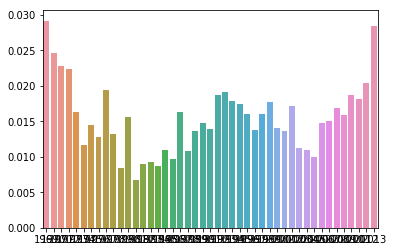

In [289]:
topic = "cs.LG"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)



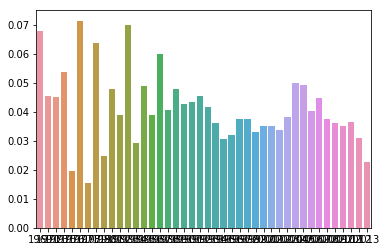

In [290]:
topic = "cs.AI"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)

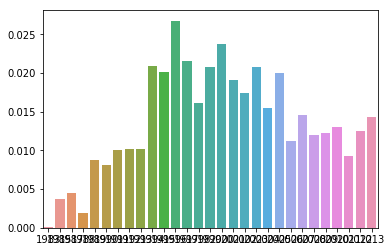

In [291]:
topic = "cs.NE"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)

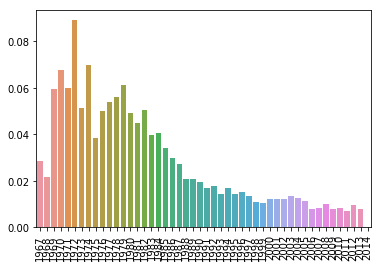

In [701]:
topic = "cs.DS"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years[:-4], y = domain_scores[:-4])
r = ax.set_xticklabels(labels=years, rotation=90)

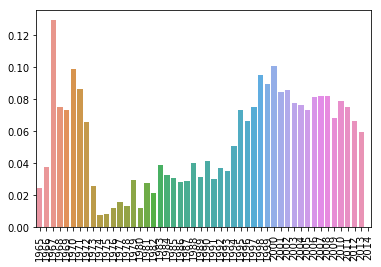

In [700]:
topic = "cs.CV"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years[:-5], y = domain_scores[:-5])
r = ax.set_xticklabels(labels=years, rotation=90)

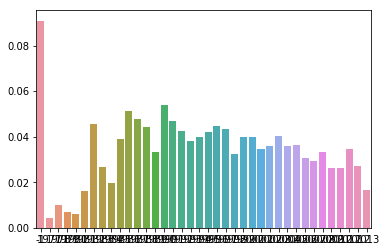

In [294]:
topic = "cs.DC"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)

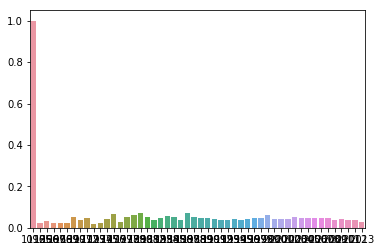

In [295]:
topic = "cs.SE"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)

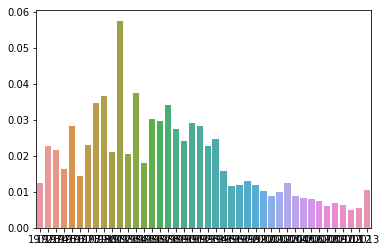

In [296]:
topic = "cs.PL"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.barplot(x = years, y = domain_scores)

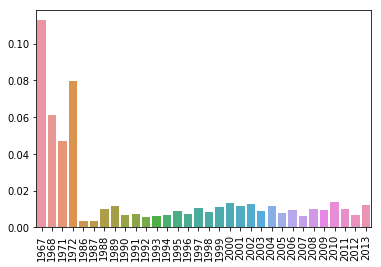

In [318]:
topic = "cs.RO"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

# print(domain_scores)
# print(years)
len(years)

ax = sns.barplot(x = years, y = domain_scores)
r = ax.set_xticklabels(labels=years, rotation=90)

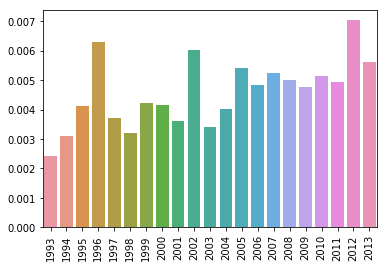

In [319]:
topic = "cs.MM"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

# print(domain_scores)
# print(years)
len(years)

ax = sns.barplot(x = years, y = domain_scores)
r = ax.set_xticklabels(labels=years, rotation=90)

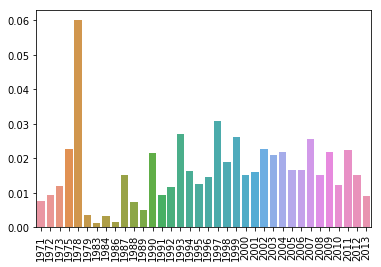

In [320]:
topic = "cs.HC"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

# print(domain_scores)
# print(years)
len(years)

ax = sns.barplot(x = years, y = domain_scores)
r = ax.set_xticklabels(labels=years, rotation=90)

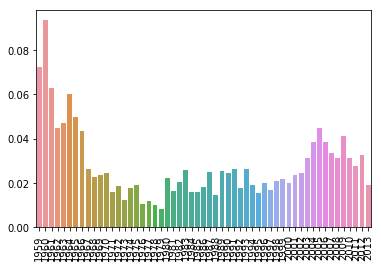

In [321]:
topic = "cs.CR"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

# print(domain_scores)
# print(years)
len(years)

ax = sns.barplot(x = years, y = domain_scores)
r = ax.set_xticklabels(labels=years, rotation=90)

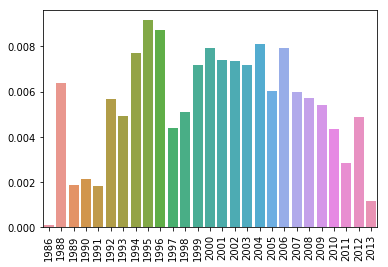

In [322]:
topic = "stat.ML"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

# print(domain_scores)
# print(years)
len(years)

ax = sns.barplot(x = years, y = domain_scores)
r = ax.set_xticklabels(labels=years, rotation=90)

In [297]:
for paper_id in citation_graph.keys():
    citation_graph[paper_id].extra["score"] = citation_graph[paper_id].reach_count*citation_graph[paper_id].page_rank*math.log10(((len(citation_graph[paper_id].inlinks) + 1)/citation_graph[paper_id].duration))

In [298]:
sorted_papers = sorted(citation_graph, key = lambda x : citation_graph[x].extra["score"])

In [300]:
sorted_papers = sorted_papers[::-1]

In [301]:
topic_p_id_dict = defaultdict(list)

for p_id in sorted_papers:
    topic = conf_topic_dict[citation_graph[p_id].journal.lower()]
    topic_p_id_dict[topic].append(p_id)


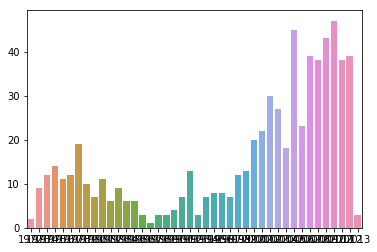

In [333]:
topic = "cs.DS"

p_id = topic_p_id_dict[topic][0]


c_val = [year_wise_citation_dict[p_id][y] for y in year_wise_citation_dict[p_id].keys()]
years = list(year_wise_citation_dict[p_id].keys())

ax = sns.barplot(x = years, y = c_val)

In [307]:
print(citation_graph[p_id].title)

The Complexity of Theorem-Proving Procedures


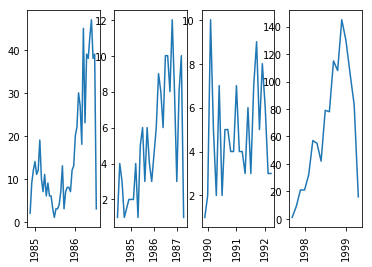

In [336]:
topic = "cs.DS"
plots = []

rows, cols = plt.subplots(ncols=4)

for i in range(4):
    p_id = topic_p_id_dict[topic][i]
    c_val = [year_wise_citation_dict[p_id][y] for y in year_wise_citation_dict[p_id].keys()]
    years = list(year_wise_citation_dict[p_id].keys())
    
    r = sns.lineplot(x = years, y = c_val, ax = cols[i])
    r = r.set_xticklabels(labels=years, rotation=90)

# for plot in plots:
#     plt.show(plot)

1971
1982
1986
1997


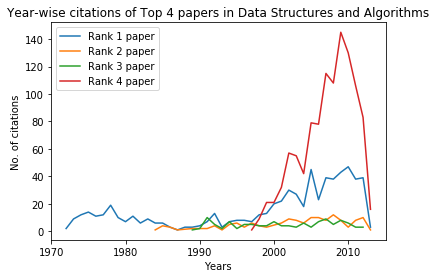

In [725]:
topic = "cs.DS"

# rows, cols = plt.subplots(ncols=4)

for i in range(4):
    p_id = topic_p_id_dict[topic][i]
    print(citation_graph[p_id].year)
    c_val = [year_wise_citation_dict[p_id][y] for y in year_wise_citation_dict[p_id].keys()]
    years = list(year_wise_citation_dict[p_id].keys())
    
    r = sns.lineplot(x = years, y = c_val, label="Rank "+str(i+1)+" paper")
    r.set_title('Year-wise citations of Top 4 papers in Data Structures and Algorithms')
    r.set_xlabel('Years')
    r.set_ylabel('No. of citations')
#     r = r.set_xticklabels(labels=years, rotation=90)
#     break


(1967, 2013)

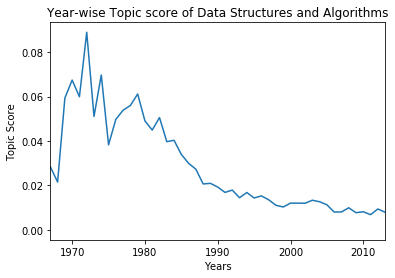

In [741]:
topic = "cs.DS"
domain_scores = [year_wise_topic_score[topic][y] for y in year_wise_topic_score[topic].keys()]
years = list(year_wise_topic_score[topic].keys())

len(years)

ax = sns.lineplot(x = years, y = domain_scores)
# r = ax.set_xticklabels(labels=years, rotation=90)
ax.set_title('Year-wise Topic score of Data Structures and Algorithms')
ax.set_xlabel('Years')
ax.set_ylabel('Topic Score')
ax.set_xlim(left=min(years), right=2013)

1993
1998
1998


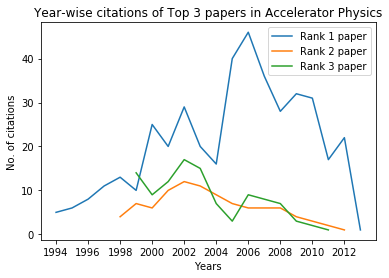

In [737]:
topic = "physics.acc-ph"

# rows, cols = plt.subplots(ncols=4)
min_year = 2010
for i in range(3):
    p_id = topic_p_id_dict[topic][i]
    print(citation_graph[p_id].year)
    c_val = [year_wise_citation_dict[p_id][y] for y in year_wise_citation_dict[p_id].keys()]
    years = list(year_wise_citation_dict[p_id].keys())
    min_year = min(min_year, min(years))
    r = sns.lineplot(x = years, y = c_val, label="Rank "+str(i+1)+" paper")
    r.set_title('Year-wise citations of Top 3 papers in Accelerator Physics')
    r.set_xlabel('Years')
    r.set_ylabel('No. of citations')
    r.set_xticks([year for year in range(min_year, 2013, 2)])

(1981, 2013)

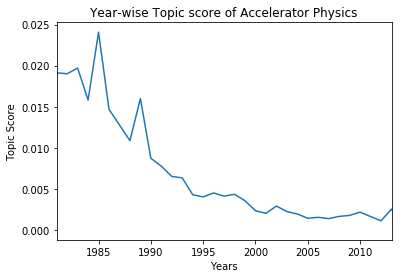

In [740]:
topic = "physics.acc-ph"
years = sorted(list(year_wise_topic_score[topic].keys()))
domain_scores = [year_wise_topic_score[topic][y] for y in years]

d = {'col1': years, 'col2': domain_scores}
df = pd.DataFrame(data=d)

# print(years)
# print(domain_scores)
len(years)

ax = sns.lineplot(x = df["col1"], y = df["col2"])
ax.set_title('Year-wise Topic score of Accelerator Physics')
ax.set_xlabel('Years')
ax.set_ylabel('Topic Score')
ax.set_xlim(left=min(years), right=2013)

In [387]:
def ewma(d, alpha, window):
    ewma_vals = [val for val in d[:window + 1]]
    for i, val in enumerate(d[window + 1:], start=window+1):
        if i in [0,1,2,3]:
            print(val)
        ewma_val = alpha * val + (1 - alpha) * d[i-1]
        ewma_vals.append(ewma_val)
    return ewma_vals

In [396]:
from copy import deepcopy

ytcr = deepcopy(year_wise_topic_score)

for topic in year_wise_topic_score:
    df = pd.DataFrame(columns = ['Years', 'Score'])
    df['Years'] = sorted(list(year_wise_topic_score[topic].keys()))
    df['Score'] = [year_wise_topic_score[topic][y] for y in df['Years']]
    df['ma'] = df['Score'].rolling(5).mean()
    for y in range(2014,2019):
        df = df.append({'Years': y, 'Score': np.average(df.iloc[-4:]['Score'])}, ignore_index=True)
        ytcr[topic][y] = df[df['Years']==y]['Score']
#     df.iloc[-5:, 2] = df.iloc[-5:, 1]
#     df['ewma'] = ewma(list(df['ma']), 0.4, 4)
    
#     print(df)
#     break

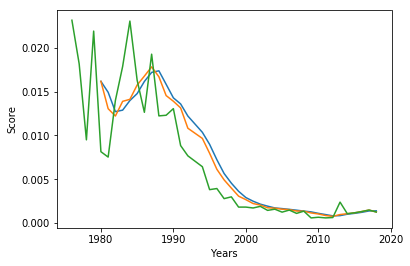

In [394]:
# topic = "physics.acc-ph"
# years = sorted(list(year_wise_topic_score[topic].keys()))
# domain_scores = [year_wise_topic_score[topic][y] for y in years]

# d = {'col1': years, 'col2': domain_scores}
# # df = pd.DataFrame(data=d)

# print(years)
# print(domain_scores)
# len(years)

ax = sns.lineplot(x = df.Years, y = df.ewma)
ax = sns.lineplot(x = df.Years, y = df.ma)
ax = sns.lineplot(x = df.Years, y = df.Score)
# r = ax.set_xticklabels(labels=df.Years, rotation=90)

In [377]:
len(citation_graph)

2146341

In [378]:
with open("citation_graph_5_12.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

with open("author_map_5_12.pkl", "wb") as f:
    pickle.dump(author_map, f)

In [453]:
training_authors = author_set - set(train_authors)

In [454]:
len(training_authors)

41549

In [455]:
# Getting Paper ID's from all these authors

paper_ids = set()

for a_name in training_authors:
    for p_id in author_map[a_name].paper_list:
        paper_ids.add(p_id)

len(paper_ids)

676566

In [456]:
len(author_map)

1232503

In [457]:
maxtopic_citation_dict = defaultdict(int)

for p_id in citation_graph.keys():
    topic = conf_topic_dict[citation_graph[p_id].journal.lower()]
    maxtopic_citation_dict[topic] = max(maxtopic_citation_dict[topic], len(citation_graph[p_id].inlinks))


In [460]:

topic_scores_l = []
topics_l = []
conf_scores_l = []
author_scores_avg_l = []


for i, id in enumerate(paper_ids):
    p_obj = citation_graph[id]
    topic = conf_topic_dict[p_obj.journal.lower()]
    topics_l.append(topic)
    topic_scores_l.append(year_wise_topic_score[topic][p_obj.year])
    if p_obj.journal.lower() in alpha_conf_dict[p_obj.journal.lower()[0]]:
        count += 1
        conf_scores_l.append(conf_dict_merged[p_obj.journal.lower()])
    else:
        fz_ratio_max = 0
        fz_conf = ""
        j = p_obj.journal.lower()
        for conf in alpha_conf_dict[j[0]]:
            fz_ratio = fuzz.ratio(j, conf)
            if fz_ratio > fz_ratio_max:
                fz_ratio_max = fz_ratio
                fz_conf = conf
            if fz_ratio_max >= 70:
                break
        if fz_ratio_max == 0:
            count1 += 1
            conf_scores_l.append(0.5)
        else:
            conf_scores_l.append(conf_dict_merged[fz_conf])
    a_sum = 0
    a_count = 0
    for a_name in p_obj.authors:
        if a_name and len(a_name)>4:
            a_sum += author_map[a_name].author_score_2
            a_count += 1
    author_scores_avg_l.append(a_sum/a_count)
    
    if i%1000 == 0:
        print(i)
    
    



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [592]:
test_topic_scores_l = []
test_topics_l = []
test_conf_scores_l = []
test_author_scores_avg_l = []
# test_labels = []
test_titles = []
test_urls = []

for i, a_name in enumerate(list(papers_2014.keys())):
    for j_obj in papers_2014[a_name]:
        journal = j_obj['journal_reference']
        if journal is not None:
            test_titles.append(j_obj['title'])
            test_urls.append(j_obj['arxiv_url'])
            topic = j_obj['arxiv_primary_category']['term']
            test_titles
            test_topics_l.append(topic)
            test_topic_scores_l.append(year_wise_topic_score[topic][j_obj['published_parsed'].tm_year])
            journal = journal.lower()
            if journal in alpha_conf_dict[journal[0]]:
                test_conf_scores_l.append(conf_dict_merged[journal])
            else:
                fz_ratio_max = 0
                fz_conf = ""
                j = journal
                for conf in alpha_conf_dict[j[0]]:
                    fz_ratio = fuzz.ratio(j, conf)
                    if fz_ratio > fz_ratio_max:
                        fz_ratio_max = fz_ratio
                        fz_conf = conf
                    if fz_ratio_max >= 70:
                        break
                if fz_ratio_max == 0:
                    count1 += 1
                    test_conf_scores_l.append(0.5)
                else:
                    test_conf_scores_l.append(conf_dict_merged[fz_conf])
            a_sum = 0
            a_count = 0
            for aa_name in j_obj['authors']:
                if aa_name and len(aa_name)>4 and aa_name in author_map.keys():
                    a_sum += author_map[aa_name].author_score_2
                    a_count += 1
            test_author_scores_avg_l.append(a_sum/a_count)

    if i%1000 == 0:
        print(i)


0
1000
2000


In [593]:
df = pd.DataFrame()
df["topic_scores_l"] = topic_scores_l
df["topics_l"] = topics_l
df["conf_scores_l"] = conf_scores_l
df["author_scores_avg_l"] = author_scores_avg_l

threshold_factor = 0.3

In [594]:
test_df = pd.DataFrame()
test_df["topic_scores_l"] = test_topic_scores_l
test_df["topics_l"] = test_topics_l
test_df["conf_scores_l"] = test_conf_scores_l
test_df["author_scores_avg_l"] = test_author_scores_avg_l

In [595]:
le = preprocessing.LabelEncoder()
values_to_fit = list(set(list(category_dict.keys()) + topics_l + test_topics_l))
le.fit(values_to_fit)
df["topics_l"] = le.transform(list(df["topics_l"].values.astype("str")))


In [511]:
training_labels = []
for i, id in enumerate(paper_ids):
    p_obj = citation_graph[id]
    topic = conf_topic_dict[p_obj.journal.lower()]
    if len(p_obj.inlinks) >= threshold_factor*maxtopic_citation_dict[topic]:
        training_labels.append(1)
    else:
        training_labels.append(0)



In [596]:
X_train = df[["topic_scores_l", "topics_l", "conf_scores_l", "author_scores_avg_l"]].values[:500000]
y_train = training_labels[:500000]

In [597]:
X_val = df[["topic_scores_l", "topics_l", "conf_scores_l", "author_scores_avg_l"]].values[500000:]
y_val = training_labels[500000:]

In [598]:
lgbm_train_dataset = lgbm.Dataset(X_train, label=y_train)
lgbm_val_dataset = lgbm.Dataset(X_val, label=y_val)

In [599]:
lgbm_params = { "objective" : "binary", "metric" : "rmse", "min_child_samples" : 30,
"num_leaves" : 15, "learning_rate" : 0.05, "verbosity" : -1}

In [600]:
model2 = lgbm.train(params=lgbm_params, train_set=lgbm_train_dataset,
num_boost_round=4000, valid_sets=[lgbm_val_dataset],early_stopping_rounds=2000)

[1]	valid_0's rmse: 0.0326361
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's rmse: 0.0319351
[3]	valid_0's rmse: 0.0321511
[4]	valid_0's rmse: 0.032066
[5]	valid_0's rmse: 0.032269
[6]	valid_0's rmse: 0.0321775
[7]	valid_0's rmse: 0.0320407
[8]	valid_0's rmse: 0.0320559
[9]	valid_0's rmse: 0.0319672
[10]	valid_0's rmse: 0.0318935
[11]	valid_0's rmse: 0.0318142
[12]	valid_0's rmse: 0.0317663
[13]	valid_0's rmse: 0.0317042
[14]	valid_0's rmse: 0.0316717
[15]	valid_0's rmse: 0.0316436
[16]	valid_0's rmse: 0.0316087
[17]	valid_0's rmse: 0.0315544
[18]	valid_0's rmse: 0.0315062
[19]	valid_0's rmse: 0.0314967
[20]	valid_0's rmse: 0.0314949
[21]	valid_0's rmse: 0.031427
[22]	valid_0's rmse: 0.0314234
[23]	valid_0's rmse: 0.031419
[24]	valid_0's rmse: 0.0314193
[25]	valid_0's rmse: 0.0313917
[26]	valid_0's rmse: 0.0313893
[27]	valid_0's rmse: 0.0313802
[28]	valid_0's rmse: 0.0313635
[29]	valid_0's rmse: 0.0313611
[30]	valid_0's rmse: 0.0313491
[31]	valid_0's rmse

[270]	valid_0's rmse: 0.0322112
[271]	valid_0's rmse: 0.0322036
[272]	valid_0's rmse: 0.0321973
[273]	valid_0's rmse: 0.0321882
[274]	valid_0's rmse: 0.0321813
[275]	valid_0's rmse: 0.0321727
[276]	valid_0's rmse: 0.032167
[277]	valid_0's rmse: 0.032162
[278]	valid_0's rmse: 0.032155
[279]	valid_0's rmse: 0.0321507
[280]	valid_0's rmse: 0.0321466
[281]	valid_0's rmse: 0.0321437
[282]	valid_0's rmse: 0.0321404
[283]	valid_0's rmse: 0.0321384
[284]	valid_0's rmse: 0.0321353
[285]	valid_0's rmse: 0.0321321
[286]	valid_0's rmse: 0.0321319
[287]	valid_0's rmse: 0.03213
[288]	valid_0's rmse: 0.0321269
[289]	valid_0's rmse: 0.032504
[290]	valid_0's rmse: 0.0324668
[291]	valid_0's rmse: 0.0324341
[292]	valid_0's rmse: 0.0324038
[293]	valid_0's rmse: 0.0323778
[294]	valid_0's rmse: 0.0323543
[295]	valid_0's rmse: 0.0323305
[296]	valid_0's rmse: 0.0323102
[297]	valid_0's rmse: 0.0322906
[298]	valid_0's rmse: 0.0322742
[299]	valid_0's rmse: 0.0322584
[300]	valid_0's rmse: 0.0322449
[301]	valid_0'

[532]	valid_0's rmse: 0.0338641
[533]	valid_0's rmse: 0.0338605
[534]	valid_0's rmse: 0.0338607
[535]	valid_0's rmse: 0.0338589
[536]	valid_0's rmse: 0.0338605
[537]	valid_0's rmse: 0.0338604
[538]	valid_0's rmse: 0.0338594
[539]	valid_0's rmse: 0.0338549
[540]	valid_0's rmse: 0.0338584
[541]	valid_0's rmse: 0.0338525
[542]	valid_0's rmse: 0.0338538
[543]	valid_0's rmse: 0.0338539
[544]	valid_0's rmse: 0.0339665
[545]	valid_0's rmse: 0.0339618
[546]	valid_0's rmse: 0.0339483
[547]	valid_0's rmse: 0.0339435
[548]	valid_0's rmse: 0.0339397
[549]	valid_0's rmse: 0.0339329
[550]	valid_0's rmse: 0.0339355
[551]	valid_0's rmse: 0.03394
[552]	valid_0's rmse: 0.0339345
[553]	valid_0's rmse: 0.0339344
[554]	valid_0's rmse: 0.0339344
[555]	valid_0's rmse: 0.0339329
[556]	valid_0's rmse: 0.0339341
[557]	valid_0's rmse: 0.0339353
[558]	valid_0's rmse: 0.0339376
[559]	valid_0's rmse: 0.0339369
[560]	valid_0's rmse: 0.0339375
[561]	valid_0's rmse: 0.0339372
[562]	valid_0's rmse: 0.0339373
[563]	vali

[790]	valid_0's rmse: 0.0340149
[791]	valid_0's rmse: 0.0340144
[792]	valid_0's rmse: 0.0340129
[793]	valid_0's rmse: 0.0340103
[794]	valid_0's rmse: 0.0340098
[795]	valid_0's rmse: 0.0340051
[796]	valid_0's rmse: 0.0340021
[797]	valid_0's rmse: 0.033998
[798]	valid_0's rmse: 0.0339955
[799]	valid_0's rmse: 0.033995
[800]	valid_0's rmse: 0.0339937
[801]	valid_0's rmse: 0.0339919
[802]	valid_0's rmse: 0.0339862
[803]	valid_0's rmse: 0.0339855
[804]	valid_0's rmse: 0.0339854
[805]	valid_0's rmse: 0.0339785
[806]	valid_0's rmse: 0.0339776
[807]	valid_0's rmse: 0.0339784
[808]	valid_0's rmse: 0.0339775
[809]	valid_0's rmse: 0.0339724
[810]	valid_0's rmse: 0.0339707
[811]	valid_0's rmse: 0.0339684
[812]	valid_0's rmse: 0.0339722
[813]	valid_0's rmse: 0.0339726
[814]	valid_0's rmse: 0.0339676
[815]	valid_0's rmse: 0.0339674
[816]	valid_0's rmse: 0.0339673
[817]	valid_0's rmse: 0.0339682
[818]	valid_0's rmse: 0.0339679
[819]	valid_0's rmse: 0.0339675
[820]	valid_0's rmse: 0.0339621
[821]	vali

[1053]	valid_0's rmse: 0.034115
[1054]	valid_0's rmse: 0.0365147
[1055]	valid_0's rmse: 0.0341961
[1056]	valid_0's rmse: 0.0341934
[1057]	valid_0's rmse: 0.0342517
[1058]	valid_0's rmse: 0.0342438
[1059]	valid_0's rmse: 0.0342331
[1060]	valid_0's rmse: 0.0342225
[1061]	valid_0's rmse: 0.0342149
[1062]	valid_0's rmse: 0.0342046
[1063]	valid_0's rmse: 0.0341961
[1064]	valid_0's rmse: 0.0341887
[1065]	valid_0's rmse: 0.0341841
[1066]	valid_0's rmse: 0.034175
[1067]	valid_0's rmse: 0.0341713
[1068]	valid_0's rmse: 0.0341687
[1069]	valid_0's rmse: 0.0341656
[1070]	valid_0's rmse: 0.0341598
[1071]	valid_0's rmse: 0.0341572
[1072]	valid_0's rmse: 0.034153
[1073]	valid_0's rmse: 0.0341511
[1074]	valid_0's rmse: 0.0341438
[1075]	valid_0's rmse: 0.0341378
[1076]	valid_0's rmse: 0.0341354
[1077]	valid_0's rmse: 0.0341289
[1078]	valid_0's rmse: 0.0341272
[1079]	valid_0's rmse: 0.0341256
[1080]	valid_0's rmse: 0.0341192
[1081]	valid_0's rmse: 0.034119
[1082]	valid_0's rmse: 0.0341152
[1083]	valid_0

[1309]	valid_0's rmse: 0.0341696
[1310]	valid_0's rmse: 0.034171
[1311]	valid_0's rmse: 0.0341719
[1312]	valid_0's rmse: 0.0341716
[1313]	valid_0's rmse: 0.0341711
[1314]	valid_0's rmse: 0.034171
[1315]	valid_0's rmse: 0.0341754
[1316]	valid_0's rmse: 0.0341765
[1317]	valid_0's rmse: 0.0341791
[1318]	valid_0's rmse: 0.0341801
[1319]	valid_0's rmse: 0.0417655
[1320]	valid_0's rmse: 0.0367036
[1321]	valid_0's rmse: 0.0357283
[1322]	valid_0's rmse: 0.0355846
[1323]	valid_0's rmse: 0.0354631
[1324]	valid_0's rmse: 0.0353561
[1325]	valid_0's rmse: 0.0352588
[1326]	valid_0's rmse: 0.0351653
[1327]	valid_0's rmse: 0.0350855
[1328]	valid_0's rmse: 0.0350079
[1329]	valid_0's rmse: 0.0349372
[1330]	valid_0's rmse: 0.034872
[1331]	valid_0's rmse: 0.0348149
[1332]	valid_0's rmse: 0.0347689
[1333]	valid_0's rmse: 0.0347108
[1334]	valid_0's rmse: 0.0346724
[1335]	valid_0's rmse: 0.0346378
[1336]	valid_0's rmse: 0.0346009
[1337]	valid_0's rmse: 0.0345663
[1338]	valid_0's rmse: 0.0345285
[1339]	valid_

[1565]	valid_0's rmse: 0.0338223
[1566]	valid_0's rmse: 0.0338221
[1567]	valid_0's rmse: 0.0338222
[1568]	valid_0's rmse: 0.0338242
[1569]	valid_0's rmse: 0.0338256
[1570]	valid_0's rmse: 0.0338269
[1571]	valid_0's rmse: 0.0338301
[1572]	valid_0's rmse: 0.0338294
[1573]	valid_0's rmse: 0.0338302
[1574]	valid_0's rmse: 0.0338295
[1575]	valid_0's rmse: 0.0338295
[1576]	valid_0's rmse: 0.0338304
[1577]	valid_0's rmse: 0.0338303
[1578]	valid_0's rmse: 0.0338295
[1579]	valid_0's rmse: 0.0338313
[1580]	valid_0's rmse: 0.0338324
[1581]	valid_0's rmse: 0.0338363
[1582]	valid_0's rmse: 0.033835
[1583]	valid_0's rmse: 0.033837
[1584]	valid_0's rmse: 0.0338376
[1585]	valid_0's rmse: 0.0338359
[1586]	valid_0's rmse: 0.0338378
[1587]	valid_0's rmse: 0.0338361
[1588]	valid_0's rmse: 0.0338381
[1589]	valid_0's rmse: 0.0348286
[1590]	valid_0's rmse: 0.0340877
[1591]	valid_0's rmse: 0.0356296
[1592]	valid_0's rmse: 0.0342518
[1593]	valid_0's rmse: 0.0343424
[1594]	valid_0's rmse: 0.0343417
[1595]	valid

[1832]	valid_0's rmse: 0.0342758
[1833]	valid_0's rmse: 0.0342794
[1834]	valid_0's rmse: 0.0342795
[1835]	valid_0's rmse: 0.0342802
[1836]	valid_0's rmse: 0.0342812
[1837]	valid_0's rmse: 0.0342829
[1838]	valid_0's rmse: 0.0342843
[1839]	valid_0's rmse: 0.0342809
[1840]	valid_0's rmse: 0.0342823
[1841]	valid_0's rmse: 0.0342823
[1842]	valid_0's rmse: 0.034282
[1843]	valid_0's rmse: 0.0342835
[1844]	valid_0's rmse: 0.0342838
[1845]	valid_0's rmse: 0.0342844
[1846]	valid_0's rmse: 0.0342848
[1847]	valid_0's rmse: 0.0342855
[1848]	valid_0's rmse: 0.0342852
[1849]	valid_0's rmse: 0.034285
[1850]	valid_0's rmse: 0.0342865
[1851]	valid_0's rmse: 0.0342859
[1852]	valid_0's rmse: 0.0342835
[1853]	valid_0's rmse: 0.0342814
[1854]	valid_0's rmse: 0.0342845
[1855]	valid_0's rmse: 0.0342858
[1856]	valid_0's rmse: 0.0342887
[1857]	valid_0's rmse: 0.0342891
[1858]	valid_0's rmse: 0.0342877
[1859]	valid_0's rmse: 0.0342885
[1860]	valid_0's rmse: 0.0342891
[1861]	valid_0's rmse: 0.034292
[1862]	valid_

[2091]	valid_0's rmse: 0.034467
[2092]	valid_0's rmse: 0.0344633
[2093]	valid_0's rmse: 0.0344631
[2094]	valid_0's rmse: 0.034462
[2095]	valid_0's rmse: 0.0344629
[2096]	valid_0's rmse: 0.0344625
[2097]	valid_0's rmse: 0.0344622
[2098]	valid_0's rmse: 0.0344618
[2099]	valid_0's rmse: 0.0344616
[2100]	valid_0's rmse: 0.0344627
[2101]	valid_0's rmse: 0.0344622
[2102]	valid_0's rmse: 0.034462
[2103]	valid_0's rmse: 0.0344619
[2104]	valid_0's rmse: 0.0344622
[2105]	valid_0's rmse: 0.0344621
[2106]	valid_0's rmse: 0.0344618
[2107]	valid_0's rmse: 0.0344618
[2108]	valid_0's rmse: 0.0345382
[2109]	valid_0's rmse: 0.0345351
[2110]	valid_0's rmse: 0.0345329
[2111]	valid_0's rmse: 0.0345343
[2112]	valid_0's rmse: 0.0345327
[2113]	valid_0's rmse: 0.0345289
[2114]	valid_0's rmse: 0.0345241
[2115]	valid_0's rmse: 0.034523
[2116]	valid_0's rmse: 0.0345222
[2117]	valid_0's rmse: 0.0345211
[2118]	valid_0's rmse: 0.0345205
[2119]	valid_0's rmse: 0.0345176
[2120]	valid_0's rmse: 0.0345133
[2121]	valid_0

In [601]:
def get_accuracy(gt, pred):
    total = len(gt)
    incorrect = sum([abs(g-p) for g,p in zip(gt, pred)])
    acc = (total - incorrect)/total
    print("Accuracy = %f" %(acc))

In [602]:
Y_pred = model2.predict(X_train, iteration=model2.best_iteration)

In [603]:
get_accuracy(y_train, Y_pred)

Accuracy = 0.998184


In [604]:
print(Y_pred)

[9.21310398e-06 1.00523523e-05 1.13679263e-02 ... 1.70026473e-04
 2.82292355e-05 2.90408907e-05]


In [605]:
count = 0
for i in y_train:
    if i >= 0.5:
        count += 1
print(count)

612


In [591]:
pprint(papers_2014[list(papers_2014.keys())[0]][0])

{'affiliation': 'None',
 'arxiv_comment': 'There is experimental error in secction 5.7',
 'arxiv_primary_category': {'scheme': 'http://arxiv.org/schemas/atom',
                            'term': 'cs.CV'},
 'arxiv_url': 'http://arxiv.org/abs/1712.07286v4',
 'author': 'Qi Tian',
 'author_detail': {'name': 'Qi Tian'},
 'authors': ['Jianing Li',
             'Shiliang Zhang',
             'Jingdong Wang',
             'Wen Gao',
             'Qi Tian'],
 'doi': None,
 'guidislink': True,
 'id': 'http://arxiv.org/abs/1712.07286v4',
 'journal_reference': None,
 'links': [{'href': 'http://arxiv.org/abs/1712.07286v4',
            'rel': 'alternate',
            'type': 'text/html'},
           {'href': 'http://arxiv.org/pdf/1712.07286v4',
            'rel': 'related',
            'title': 'pdf',
            'type': 'application/pdf'}],
 'pdf_url': 'http://arxiv.org/pdf/1712.07286v4',
 'published': '2017-12-20T01:38:53Z',
 'published_parsed': time.struct_time(tm_year=2017, tm_mon=12, tm_mday=2

In [606]:
test_df["topics_l"] = le.transform(list(test_df["topics_l"].values.astype("str")))

In [607]:
X_test = test_df[["topic_scores_l", "topics_l", "conf_scores_l", "author_scores_avg_l"]].values

In [608]:
Ytest_pred = model2.predict(X_test, iteration=model2.best_iteration)

In [610]:
test_labels = []
for i in range(len(Ytest_pred)):
    label = ""
    if Ytest_pred[i] >= 0.5:
        label = "Popular"
    else:
        label = "Not Popular"
    test_labels.append((label, test_titles[i], test_urls[i]))

In [616]:
pop_count = [i for i,t in enumerate(test_labels) if t[0] == "Popular"]

In [618]:
popular_papers = [test_labels[i] for i in pop_count]

In [619]:
popular_papers

[('Popular',
  'Probabilistic Constraint Programming for Parameters Optimisation of\n  Generative Models',
  'http://arxiv.org/abs/1505.07744v1'),
 ('Popular',
  'Vlasov methods in space physics and astrophysics',
  'http://arxiv.org/abs/1808.05885v1'),
 ('Popular',
  'Roads and cities of $18^{th}$ century France',
  'http://arxiv.org/abs/1509.09055v1'),
 ('Popular',
  'Asynchronous Rumor Spreading on Random Graphs',
  'http://arxiv.org/abs/1608.01766v1'),
 ('Popular',
  'Structural health monitoring with distributed wireless sensor networks',
  'http://arxiv.org/abs/1807.09221v1'),
 ('Popular',
  'Sensor Networks Architecture for Vehicles and Pedestrians Traffic\n  Control',
  'http://arxiv.org/abs/1807.09222v1'),
 ('Popular',
  'A knowledge based system approach in securing distributed wireless\n  sensor networks',
  'http://arxiv.org/abs/1807.03983v1'),
 ('Popular', 'Bursty Human Dynamics', 'http://arxiv.org/abs/1803.02580v1'),
 ('Popular',
  'Hierarchy of Scales in Language Dynamic

In [528]:
author_set_old = deepcopy(author_set)

In [625]:
author_names_h.index('Julien Perret')

248835

In [638]:
req_topic = 'cs.RO'
author_topic_dict = defaultdict(set)

a_list = []


for a_name in author_map.keys():
    pl = author_map[a_name].paper_list
    for id in pl:
        p_obj = citation_graph[id]
        topic = conf_topic_dict[p_obj.journal.lower()]
        author_topic_dict[a_name].add(topic)
        
#         if topic == req_topic:
#             a_list.append(a_name)
#             break
#     if len(a_list) == 10:
#         break
        
        
    

In [702]:
len(author_topic_dict['Wei Wang'])

100

In [703]:
topic_threshold = 20
req_topic = 'cs.CV'
a_list = []

for a_name in author_names:
    if len(author_topic_dict[a_name]) <= topic_threshold:
        if req_topic in author_topic_dict[a_name]:
            a_list.append(a_name)
    if len(a_list) == 100:
        break

In [653]:
a_list

['Mohamed-Slim Alouini',
 'Saharon Shelah',
 'Robert L. Glass',
 'John M. Cioffi',
 'B. Sundar Rajan',
 'Michele Zorzi',
 'Vojtech Rödl',
 'Kannan Ramchandran',
 'Chung-Kuan Cheng',
 'Tho Le-Ngoc',
 'Mihir Bellare',
 'Surajit Chaudhuri',
 'Changsheng Xu',
 'Adi Shamir',
 'Ivan Damgård',
 'Shree K. Nayar',
 'Salil P. Vadhan',
 'José M. F. Moura',
 'Martin D. F. Wong',
 'Baochun Li',
 'Giuseppe Liotta',
 'Sergio Verdú',
 'Daniel Cohen-Or',
 'Jaroslav Nesetril',
 'Bojan Mohar',
 'Chunming Qiao',
 'Antonio Ortega',
 'Paul Erdös',
 'Ken-ichi Kawarabayashi',
 'Frank K. Hwang',
 'Bruce A. Reed',
 'Ran Canetti',
 'Michael Krivelevich',
 'Russell Impagliazzo',
 'Baba C. Vemuri',
 'Dorin Comaniciu',
 'Amit Sahai',
 'Gershon Elber',
 'Nick Koudas',
 'Guohong Cao',
 'Daniel S. Yeung',
 'Frank Wolter',
 'Yevgeniy Dodis',
 'Xian-He Sun',
 'D. F. Wong',
 'Ran Raz',
 'Zoltán Füredi',
 'Andrew Blake',
 'Boris Aronov',
 'David Pointcheval',
 'Melvin A. Breuer',
 'Nader H. Bshouty',
 'Paul D. Seymour',
 

In [628]:
len(conf_topic_dict)

8694

In [664]:
def topic_create_author_map(graph, rtopic):
    authors_map = {}
    for paper_id in graph.keys():
        p_obj = graph[paper_id]
        topic = conf_topic_dict[p_obj.journal.lower()]
        if topic == rtopic:
            for a_index,a_name in enumerate(graph[paper_id].authors):
                if a_name and len(a_name)>4:
                    if a_name not in authors_map.keys():
                        authors_map[a_name] = Author()
    #                 authors_map[a_name].author_org_list.append(a_org)
                    authors_map[a_name].paper_list.append(paper_id)
                    authors_map[a_name].citations.append(len(graph[paper_id].inlinks))
                    authors_map[a_name].author_score += graph[paper_id].page_rank
                    author_index_weight = 1/(2**a_index)
                    authors_map[a_name].author_score_list.append(graph[paper_id].reach_count*author_index_weight*graph[paper_id].page_rank*math.log10(((len(graph[paper_id].inlinks) + 1)/graph[paper_id].duration)))
        
    for a_name in authors_map.keys():
#         authors_map[a_name].author_score = authors_map[a_name].author_score / len(authors_map[a_name].paper_list)
#         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list)
         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list) + math.log10(len(authors_map[a_name].paper_list))/len(citation_graph)
    return authors_map

In [665]:
cv_author_map = topic_create_author_map(citation_graph, 'cs.CV')

In [667]:
calc_h_index(cv_author_map)

In [668]:
cv_author_names_h = sorted(cv_author_map.keys(), key = lambda x: cv_author_map[x].h_index)[::-1]
cv_author_names = sorted(cv_author_map.keys(), key = lambda x: cv_author_map[x].author_score_2)[::-1]

cv_top_n_our_index = top_n(1000, cv_author_names)
cv_top_n_h_index = top_n(1000, cv_author_names_h)

In [681]:
cv_author_names[:20]

['Edgar Osuna',
 'Robert Freund',
 'Jeff Conklin',
 'Jeffrey O. Kephart',
 'Jeffrey Hightower',
 'Nanette J. Boden',
 'David M. Chess',
 'Jason L. Hill',
 'William C. Athas',
 'Edward J. Coyne',
 'Edwin R. Hancock',
 'Thomas S. Huang',
 'Hal L. Feinstein',
 'Wen Gao',
 'Luc J. Van Gool',
 'Josef Kittler',
 'Rama Chellappa',
 'Andrew Zisserman',
 'Aggelos K. Katsaggelos',
 'Nassir Navab']

In [671]:
cv_author_names_h[:20]

['Andrew Zisserman',
 'Jitendra Malik',
 'Michael J. Black',
 'Takeo Kanade',
 'Richard Szeliski',
 'Shree K. Nayar',
 'Anil K. Jain',
 'Luc J. Van Gool',
 'Cordelia Schmid',
 'Andrew Blake',
 'Olivier D. Faugeras',
 'David A. Forsyth',
 'William T. Freeman',
 'Pietro Perona',
 'Bill Triggs',
 'Ron Kimmel',
 'Rachid Deriche',
 'Luca Benini',
 'Giovanni De Micheli',
 'Dimitris N. Metaxas']

In [695]:
len(cv_author_map['Andrew Zisserman'].paper_list)

215

In [694]:
i = max(cv_author_map['Andrew Zisserman'].paper_list, key = lambda x : len(citation_graph[x].inlinks))
len(citation_graph[i].inlinks)

488

In [682]:
lg_author_map = topic_create_author_map(citation_graph, 'cs.LG')
calc_h_index(lg_author_map)
lg_author_names_h = sorted(lg_author_map.keys(), key = lambda x: lg_author_map[x].h_index)[::-1]
lg_author_names = sorted(lg_author_map.keys(), key = lambda x: lg_author_map[x].author_score_2)[::-1]

lg_top_n_our_index = top_n(1000, lg_author_names)
lg_top_n_h_index = top_n(1000, lg_author_names_h)

In [685]:
lg_author_names[:20]

['Eric Bauer',
 'Peter Clark',
 'Alexander Strehl',
 'Kamal Nigam',
 'Philip S. Yu',
 'Ming-Syan Chen',
 'Karl J. Friston',
 'Paul M. Thompson',
 'Jiawei Han',
 'Arthur W. Toga',
 'Elisa Bertino',
 'George Forman',
 'Sarit Kraus',
 'Christos Faloutsos',
 'Trevor J. M. Bench-Capon',
 'Luc De Raedt',
 'Bruce Fischl',
 'Zhi-Hua Zhou',
 'Qiang Yang',
 'Thomas G. Dietterich']

In [686]:
lg_author_names_h[:20]

['Philip S. Yu',
 'Jiawei Han',
 'Michael I. Jordan',
 'Rina Dechter',
 'Yoram Singer',
 'Elisa Bertino',
 'Manfred K. Warmuth',
 'Thomas G. Dietterich',
 'Judea Pearl',
 'Thomas Eiter',
 'Sarit Kraus',
 'Robert E. Schapire',
 'Joseph Y. Halpern',
 'Sushil Jajodia',
 'Ming-Syan Chen',
 'Richard E. Korf',
 'Christos Faloutsos',
 'Craig Boutilier',
 'Yoav Shoham',
 'V. S. Subrahmanian']

In [687]:
db_author_map = topic_create_author_map(citation_graph, 'cs.DB')
calc_h_index(db_author_map)
db_author_names_h = sorted(db_author_map.keys(), key = lambda x: db_author_map[x].h_index)[::-1]
db_author_names = sorted(db_author_map.keys(), key = lambda x: db_author_map[x].author_score_2)[::-1]

db_top_n_our_index = top_n(1000, db_author_names)
db_top_n_h_index = top_n(1000, db_author_names_h)

In [690]:
db_author_names[:20]

['Grady Booch',
 'James E. Rumbaugh',
 'Peter Cheeseman',
 'Mike W. Blasgen',
 'Gerhard Weikum',
 'David B. Lomet',
 'Hector Garcia-Molina',
 'H. V. Jagadish',
 'Richard T. Snodgrass',
 'Christian S. Jensen',
 'Divesh Srivastava',
 'Michael Stonebraker',
 'Jiawei Han',
 'Dan Suciu',
 'Surajit Chaudhuri',
 'Michael J. Carey',
 'David J. DeWitt',
 'Hans-Peter Kriegel',
 'Jennifer Widom',
 'Philip S. Yu']

In [691]:
db_author_names_h[:20]

['Hector Garcia-Molina',
 'David J. DeWitt',
 'Jennifer Widom',
 'Rakesh Agrawal',
 'H. V. Jagadish',
 'Jeffrey F. Naughton',
 'Michael J. Carey',
 'Michael Stonebraker',
 'Dan Suciu',
 'Raghu Ramakrishnan',
 'Joseph M. Hellerstein',
 'Michael J. Franklin',
 'Serge Abiteboul',
 'Divesh Srivastava',
 'Alon Y. Halevy',
 'Surajit Chaudhuri',
 'Minos N. Garofalakis',
 'Yannis E. Ioannidis',
 'Jiawei Han',
 'Christos Faloutsos']

In [ ]:
for i, a1 in author_names:
    for a2 in auth